# Part 2: Modelling and Customer Analysis

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_df.csv')

In [3]:
df

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2207  61223.0        0         1       46       709         43   
2208  64014.0        2         1       56       406          0   
2209  56981.0        0         0       91       908         48   
2210  69245.0        0         1        8       428         30   
2211  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2                 1             6  ...   
2                 127              111                21            42  ...   
3                  20               10                 3             5  ...   
4                 118               46                27            15  ...   
...               ...              ...               ...           ...  ...   
2207              182               42               118           247  ...   
2208               30                0                 0             8  ...   
2209              217               32                12            24  ...   
2210              214               80                30            61  ...   
2211               61                2                 1            21  ...   

      Response  Customer Days  Age  Total_Spent  Education_Graduate  \
0            1            971   57         1617                   1   
1            0            125   60           27                   1   
2            0            472   49          776                   1   
3            0             65   30           53                   1   
4            0            321   33          422                   0   
...        ...            ...  ...          ...                 ...   
2207         0            541   47         1341                   1   
2208         0             61   68          444                   0   
2209         0            315   33         1241                   1   
2210         0            316   58          843                   0   
2211         1            782   60          172                   0   

      Education_Postgraduate  Education_Undergraduate  Marital_Status_Married  \
0                          0                        0                       0   
1                          0                        0                       0   
2                          0                        0                       0   
3                          0                        0                       0   
4                          1                        0                       1   
...                      ...                      ...                     ...   
2207                       0                        0                       1   
2208                       1                        0                       0   
2209                       0                        0                       0   
2210                       1                        0                       0   
2211                       1                        0                       1   

      Marital_Status_Single  Marital_Status_Together  
0                         1                        0  
1                         1                        0  
2                         0                        1  
3                         0                        1  
4                         0                        0  
...                     ...                      ...  
2207                      0                        0  

## Principal Component Analysis (PCA) and Clustering

Since the dataset contains many features, it would be difficult to work with all of them. Therefore we will perform Dimensionality Reduction with PCA, to reduce the dimension of our dataframe to three. First, let's scale the data.

In [5]:
from sklearn.preprocessing import StandardScaler

# Scaling the data with the standard scaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [7]:
from sklearn.decomposition import PCA

# Reducing dimension of dataframe to three with PCA

pca = PCA(n_components=3)
pca.fit(scaled_df)

PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["column1","column2","column3"]))

In [9]:
PCA_df.describe().transpose()

count          mean       std       min       25%       50%  \
column1  2212.0  4.416800e-17  2.766828 -5.256482 -2.529749 -0.736144   
column2  2212.0  3.874739e-17  1.503617 -3.538458 -1.204795 -0.133592   
column3  2212.0  3.212219e-18  1.412399 -3.604643 -0.884263 -0.076380   

              75%       max  
column1  2.273474  8.355995  
column2  1.030112  5.564150  
column3  0.704854  7.954045

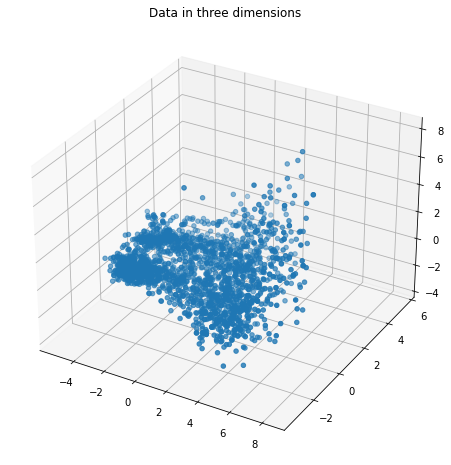

In [12]:
# A 3D plot of the resulting PCA_df

x = PCA_df["column1"]
y = PCA_df["column2"]
z = PCA_df["column3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z)
ax.set_title("Data in three dimensions")
plt.show()

In order to know how many clusters we should take into account, we will use the following elbow method.

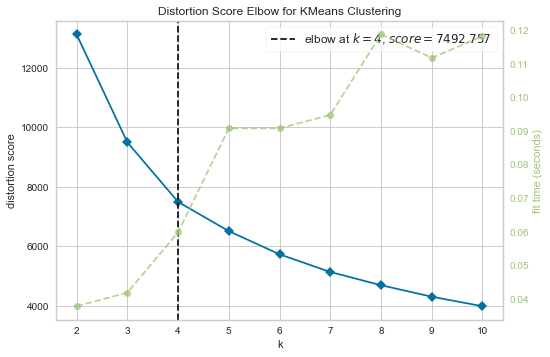

In [24]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show();

According to the distortion score, we should be using K=4.

To construct the clusters, let's first try with Agglomerative Clustering.

In [25]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)

# Fitting model and predicting clusters
preds_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = preds_AC

# Adding the Clusters feature to the original dataframe.
df["Clusters"]= preds_AC

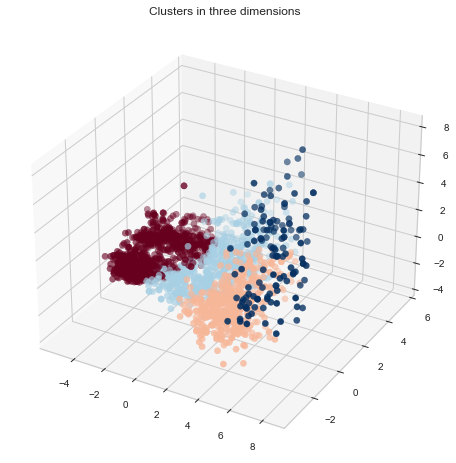

In [38]:
# Plotting the clusters in the dimensionally reduced space

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], cmap='RdBu')
ax.set_title("Clusters in three dimensions")
plt.show();

## Customer Segmentation

In this customer analysis, we will be reviewing some of the features that could characterize our customer clusters, and try to explain their profiles.

First, let's see what the distribution of the clusters looks like.

<AxesSubplot:xlabel='Clusters', ylabel='count'>

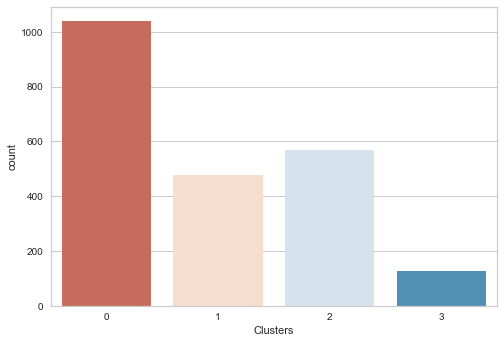

In [43]:
sns.countplot(data=df, x='Clusters', palette='RdBu')

It seems that most people belong to the Cluster 0, and least people to the Cluster 3. How much they've spent could be a clear "separator" in this case, let's check this out.

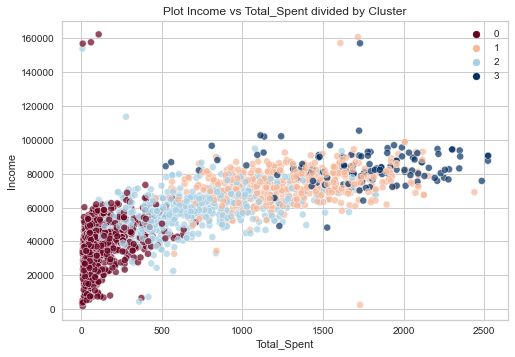

In [46]:
pl = sns.scatterplot(data=df, x="Total_Spent", y='Income',hue='Clusters', palette='RdBu', alpha=.7)
pl.set_title('Plot Income vs Total_Spent divided by Cluster')
plt.legend()
plt.show()

As we can see, it does seem to be pretty consisten that Cluster 0 tends to spend less. Cluster 2 ranks 3rd, Cluster 1 ranks 2nd and Cluster 3 is the one that usually spends the most, with a few ones as exceptions. This is also true regarding their income, but we already knew this since Income and Total_Spent are linearly correlated.

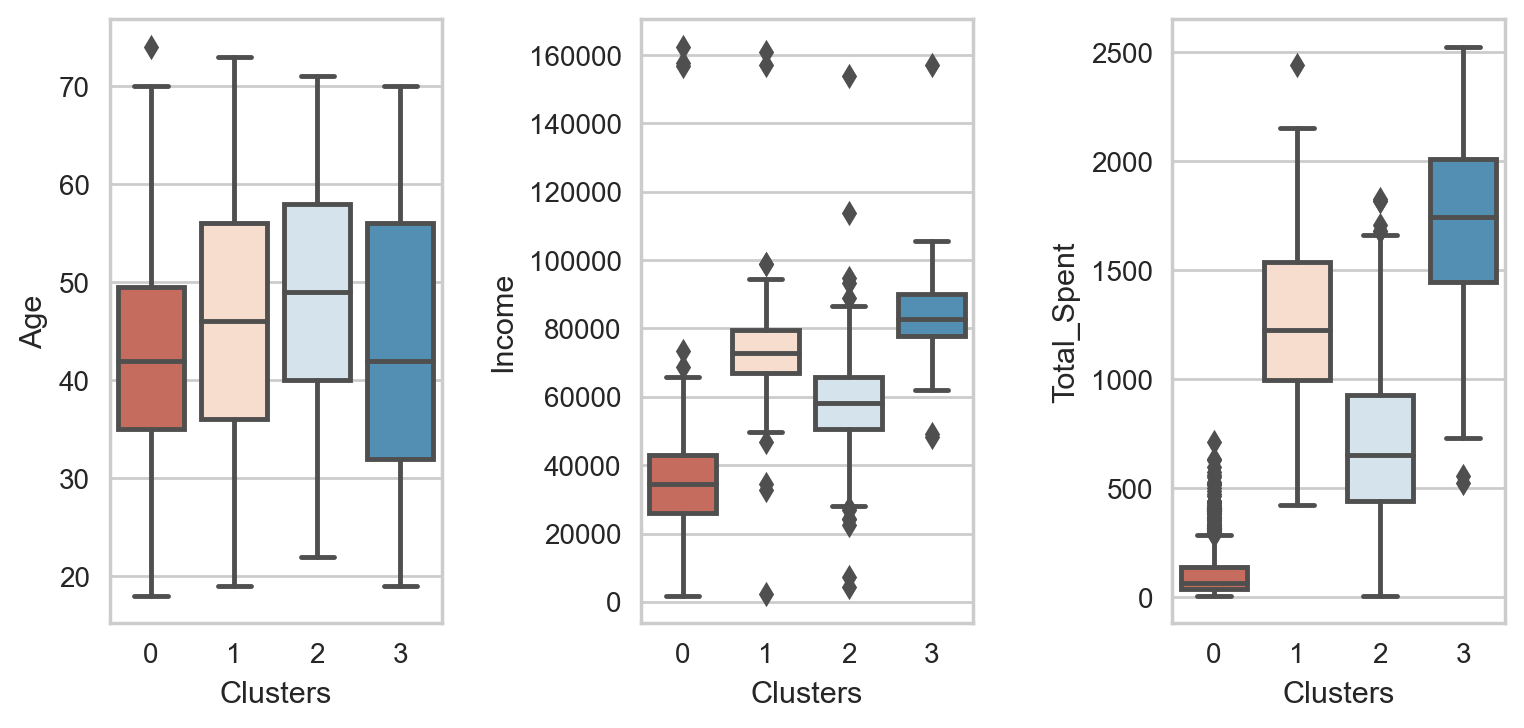

In [52]:
fig, axes = plt.subplots(1, 3, dpi=200, figsize=(9,4))

sns.boxplot(ax=axes[0], data=df, y='Age', x='Clusters', palette='RdBu')
sns.boxplot(ax=axes[1], data=df, y='Income', x='Clusters', palette='RdBu')
sns.boxplot(ax=axes[2], data=df, y='Total_Spent', x='Clusters', palette='RdBu')

fig.subplots_adjust(wspace=.6);

Here there seems to be a consistent increasing of average age between Clusters 0, 1 and 2, whereas Cluster 3 is kind of mixed. Also, we can confirm what we said about Income and Total_Spent.

Let's now look at their purchases behaviour.

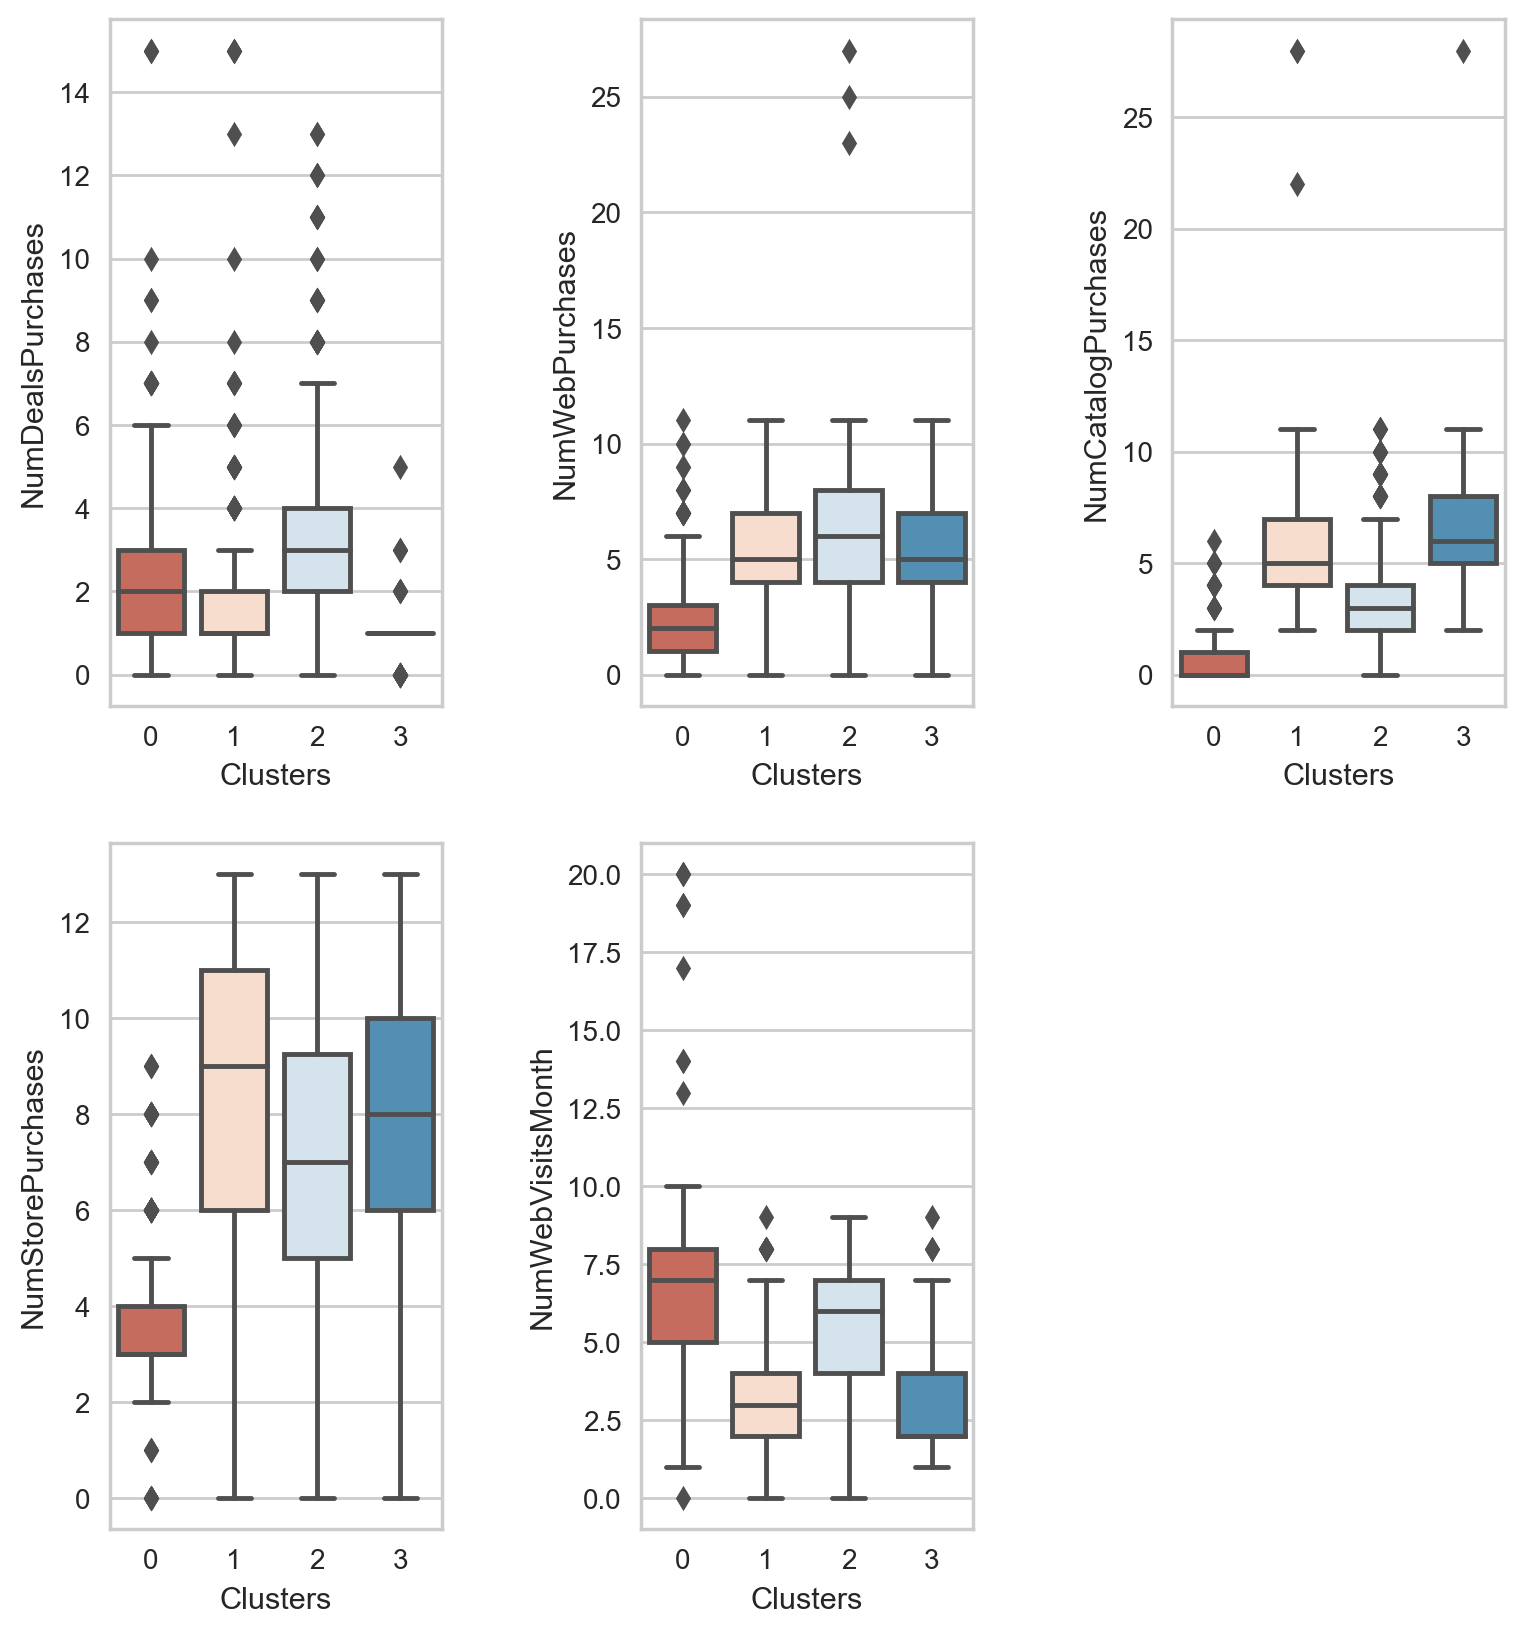

In [125]:
fig, axes = plt.subplots(2, 3, dpi=200, figsize=(9,10))

sns.boxplot(ax=axes[0,0], data=df, y='NumDealsPurchases', x='Clusters', palette='RdBu')
sns.boxplot(ax=axes[0,1], data=df, y='NumWebPurchases', x='Clusters', palette='RdBu')
sns.boxplot(ax=axes[0,2], data=df, y='NumCatalogPurchases', x='Clusters', palette='RdBu')
sns.boxplot(ax=axes[1,0], data=df, y='NumStorePurchases', x='Clusters', palette='RdBu')
sns.boxplot(ax=axes[1,1], data=df, y='NumWebVisitsMonth', x='Clusters', palette='RdBu')
axes[1,2].remove()

fig.subplots_adjust(wspace=.6);

- Cluster 0 doesn't usually make many purchases, this can be infered from the fact that it ranks lower in purchases from the Store, Website and Catalog, despite the fact that Cluster 0 spends the most time visiting the website.
- Cluster 2 tends to make more purchases with discounts.
- Cluster 1 and 3 make more purchases from the Catalog as well as the Store than the others.
- Cluster 1 and 3 spend the least time visiting the website.

Let's see how the Clusters relate to having kids or teens.

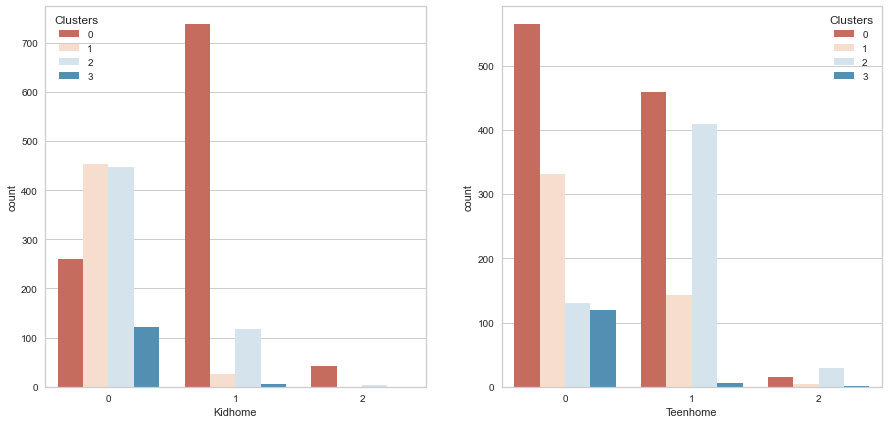

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))

sns.countplot(ax=axes[0], data=df, x='Kidhome', hue='Clusters', palette='RdBu')
sns.countplot(ax=axes[1], data=df, x='Teenhome', hue='Clusters', palette='RdBu');

We can see that Cluster 0 is more likely to have at least 1 kid, whereas Cluster 2 is the one who is most leaned to have at least 1 teen. Cluster 3 usually has no kids nor teens.

Next, we will see how Clusters accept marketing campaigns.

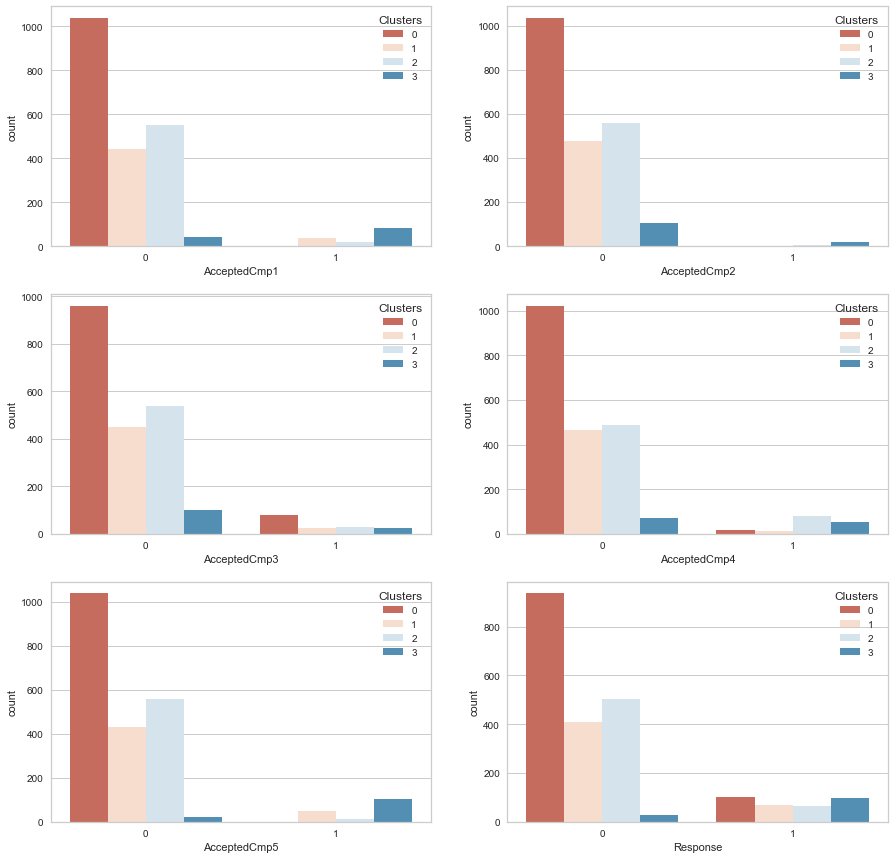

In [119]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))

sns.countplot(ax=axes[0,0],data=df, x='AcceptedCmp1', hue='Clusters', palette='RdBu')
sns.countplot(ax=axes[0,1],data=df, x='AcceptedCmp2', hue='Clusters', palette='RdBu')
sns.countplot(ax=axes[1,0],data=df, x='AcceptedCmp3', hue='Clusters', palette='RdBu')
sns.countplot(ax=axes[1,1],data=df, x='AcceptedCmp4', hue='Clusters', palette='RdBu')
sns.countplot(ax=axes[2,0],data=df, x='AcceptedCmp5', hue='Clusters', palette='RdBu')
sns.countplot(ax=axes[2,1],data=df, x='Response', hue='Clusters', palette='RdBu');

We have mixex results:

- We can see that Cluster 0 tends to respond only to selected campaigns, like 3 and 6 (Response).
- Despite being the fewest, Cluster 3 responds pretty well to most of the campaigns. 

In order to compare the categorical features, we will load the dataframe from the previous part without one-hot encoded features.

In [54]:
original_df = pd.read_csv('df.csv')
original_df['Clusters'] = df['Clusters']
original_df.head(3)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0         Graduate         Single  58138.0        0         0       58   
1         Graduate         Single  46344.0        1         1       38   
2         Graduate       Together  71613.0        0         0       26   
3         Graduate       Together  26646.0        1         0       26   
4     Postgraduate        Married  58293.0        1         0       94   
...            ...            ...      ...      ...       ...      ...   
2207      Graduate        Married  61223.0        0         1       46   
2208  Postgraduate       Together  64014.0        2         1       56   
2209      Graduate         Single  56981.0        0         0       91   
2210  Postgraduate       Together  69245.0        0         1        8   
2211  Postgraduate        Married  52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0          635         88              546              172  ...   
1           11          1                6                2  ...   
2          426         49              127              111  ...   
3           11          4               20               10  ...   
4          173         43              118               46  ...   
...        ...        ...              ...              ...  ...   
2207       709         43              182               42  ...   
2208       406          0               30                0  ...   
2209       908         48              217               32  ...   
2210       428         30              214               80  ...   
2211        84          3               61                2  ...   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2207             0             0             0             0         0   
2208             0             0             1             0         0   
2209             1             0             0             0         0   
2210             0             0             0             0         0   
2211             0             0             0             0         0   

      Response  Customer Days  Age  Total_Spent  Clusters  
0            1            971   57         1617         1  
1            0            125   60           27         0  
2            0            472   49          776         1  
3            0             65   30           53         0  
4            0            321   33          422         2  
...        ...            ...  ...          ...       ...  
2207         0            541   47         1341         1  
2208         0             61   68          444         2  
2209         0            315   33         1241         2  
2210         0            316   58          843         2  
2211         1            782   60          172         0  

[2212 rows x 28 columns]

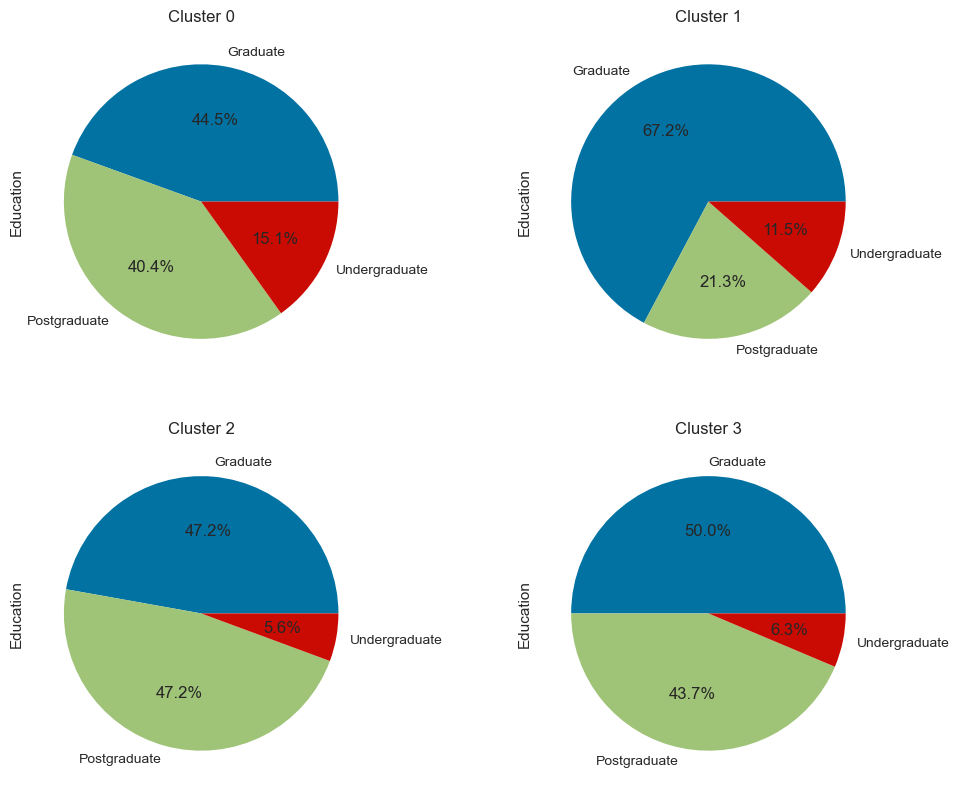

In [88]:
fig, axes = plt.subplots(2, 2, dpi=100, figsize=(12,10))

original_df[original_df['Clusters']==0]['Education'].value_counts().plot.pie(title='Cluster 0',ax=axes[0,0], autopct='%1.1f%%')
original_df[original_df['Clusters']==1]['Education'].value_counts().plot.pie(title='Cluster 1',ax=axes[0,1], autopct='%1.1f%%')
original_df[original_df['Clusters']==2]['Education'].value_counts().plot.pie(title='Cluster 2',ax=axes[1,0], autopct='%1.1f%%')
original_df[original_df['Clusters']==3]['Education'].value_counts().plot.pie(title='Cluster 3',ax=axes[1,1], autopct='%1.1f%%');

Cluster 0 has slightly more Undergraduates than the other ones, but it's more mixed in general, and Cluster 2 and 3 have better Education than the other ones.

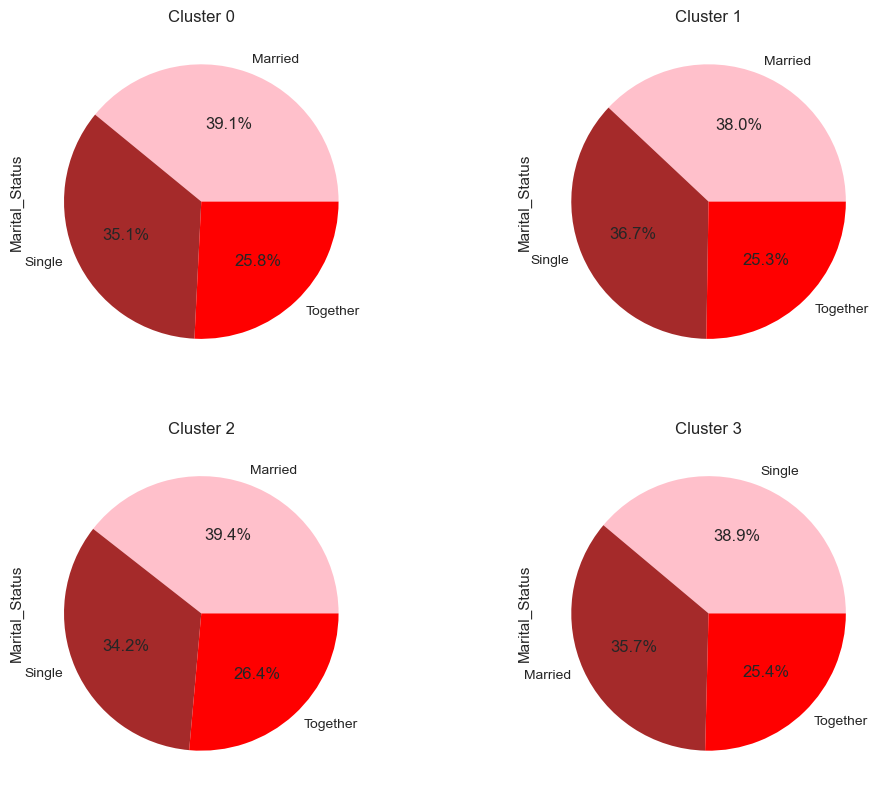

In [94]:
fig, axes = plt.subplots(2, 2, dpi=100, figsize=(12,10))

original_df[original_df['Clusters']==0]['Marital_Status'].value_counts().plot.pie(title='Cluster 0',ax=axes[0,0], autopct='%1.1f%%', colors = ['pink', 'brown', 'red'])
original_df[original_df['Clusters']==1]['Marital_Status'].value_counts().plot.pie(title='Cluster 1',ax=axes[0,1], autopct='%1.1f%%', colors = ['pink', 'brown', 'red'])
original_df[original_df['Clusters']==2]['Marital_Status'].value_counts().plot.pie(title='Cluster 2',ax=axes[1,0], autopct='%1.1f%%', colors = ['pink', 'brown', 'red'])
original_df[original_df['Clusters']==3]['Marital_Status'].value_counts().plot.pie(title='Cluster 3',ax=axes[1,1], autopct='%1.1f%%', colors = ['pink', 'brown', 'red']);

There are no significant differences between Marital_Status among the Clusters.

Finally, there's the 'Complain' feature. Let's see how many customers have complained.

In [130]:
print('Customers that have complained:', len(df[df['Complain']==1]), 
     'out of', len(df))

Customers that have complained: 20 out of 2212


In [131]:
df[df['Complain']==1]['Clusters'].value_counts()

0    12
1     4
2     3
3     1
Name: Clusters, dtype: int64

Even with the above result, there's simply not enough observations that have complained to infer anything about the Clusters behaviour regarding this.

## Final Profiling

Cluster 0:

- It's the most prevalent Cluster.
- Has the least Income and Total_Spent.
- Doesn't make a lot of purchases in general.
- Visits the website more than the others.
- Slithly younger then the others.
- Usually has one or more kids.
- Responds only to a few marketing campaigns.
- Its 'Education' feature is pretty mixed.

Cluster 1:

- Ranks 2nd in Income and Total_Spent.
- Slightly older than Cluster 0.
- Doesn't make a lot of purchases with discounts.
- Buys mostly from the Catalog and the Store.
- Doesn't buy much from the website.
- Doesn't spend much time on the website.
- Doesn't usually have kids, but can have teenegers.
- Sometimes responds to the marketing campaigns.
- It's the Cluster with highest percentage of Graduates.

Cluster 2:
 
 - Ranks 3rd in Income and Total_Spent.
 - Tends to be older than all of the other Clusters.
 - It's the one who makes the most purchases with discounts.
 - Usually vistis the website.
 - Usually buys from the website.
 - Doesn't usually buy from the Catalog.
 - Sometimes buys at the Store.
 - It's the cluster with more teenagers than the other ones.
 - Sometimes reponds to the marketing campaigns.
 - Best education, with almost half of them being Postgraduates.
 
Cluster 3:
 - The least prevalent Cluster of all.
 - Highest Income and Total_Spent.
 - Balanced age.
 - Doesn't tend to have kids nor teenagers in their household.
 - Buys from the Store, Catalog and Website, but doesn't visit the website a lot.
 - Doesn't seem to make a lot of purchases with discounts.
 - Highest response to the marketing campaigns.
 - Ranks 2nd in Education.